##### Importing Libraries

In [857]:
import pandas as pd 
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### Import data

In [858]:
df = pd.read_csv(r"C:\Users\hp.MUKESH-LF4B6N6\OneDrive\Documents\Desktop\influncer-project\Influencer5.csv", encoding="latin-1" )

In [859]:
df

,Rank,Channel_Info,Influence_Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New_Post Avg. Likes,Total_Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


##### Head of the dataset

In [860]:
df.head()

,Rank,Channel_Info,Influence_Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New_Post Avg. Likes,Total_Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


##### Shape of the dataset

In [861]:
df.shape

(200, 10)

##### Info of the dataset

In [862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel_Info         200 non-null    object 
 2   Influence_Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New_Post Avg. Likes  200 non-null    object 
 8   Total_Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


dtypes of the dataset

In [863]:
df.dtypes

Rank                     int64
Channel_Info            object
Influence_Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New_Post Avg. Likes     object
Total_Likes             object
Country Or Region       object
dtype: object

##### Null Values of dataset

In [864]:
df.isnull().sum()/df.shape[0]*100

Rank                    0.0
Channel_Info            0.0
Influence_Score         0.0
Followers               0.0
Avg. Likes              0.0
Posts                   0.0
60-Day Eng Rate         0.0
New_Post Avg. Likes     0.0
Total_Likes             0.0
Country Or Region      31.5
dtype: float64

<Axes: >

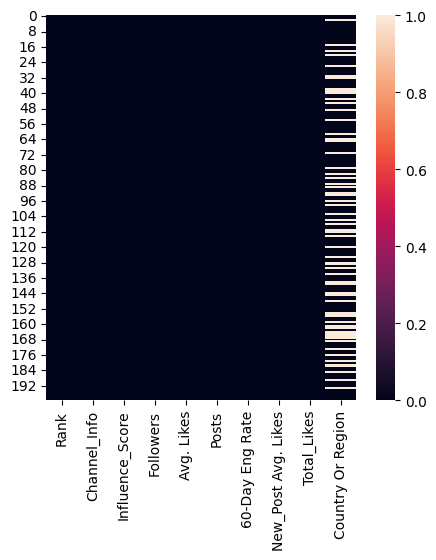

In [865]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

##### Check the column names

In [866]:
# List of columns to drop
columns_to_drop = ['Channel_Info']
# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [867]:
df.dropna(subset=['Country Or Region'], axis=0, inplace=True)
df.shape


(137, 9)

In [868]:
df.isnull().sum()

Rank                   0
Influence_Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New_Post Avg. Likes    0
Total_Likes            0
Country Or Region      0
dtype: int64

<Axes: >

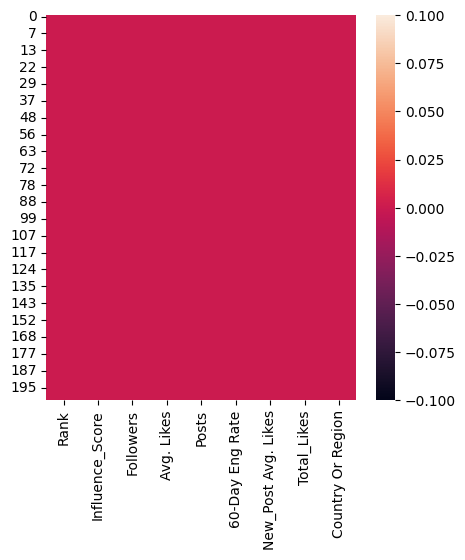

In [869]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

##### Categorical columns

In [870]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

Categorical columns : ['Followers', 'Avg. Likes', 'Posts', 'New_Post Avg. Likes', 'Total_Likes', 'Country Or Region']


##### Numerical columns

In [871]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns:', num_col)

Numerical columns: ['Rank', 'Influence_Score', '60-Day Eng Rate']


Check the total number of unique values in the Categorical columns

In [872]:
df[cat_col].nunique()


Followers              127
Avg. Likes              96
Posts                   92
New_Post Avg. Likes    120
Total_Likes             87
Country Or Region       25
dtype: int64

In [873]:
# Define a function to clean and convert the column to float
def clean_and_convert(value):
    try:
        # Remove 'm' character and convert to float
        return float(value.replace('m', ''))
    except ValueError:
        # Handle any other potential errors, e.g., if the value cannot be converted
        return None  

In [874]:
# Apply the cleaning and conversion function to the column containing 'm' values
column_name = 'Avg. Likes'  # Replace with the actual column name
df[column_name] = df[column_name].apply(clean_and_convert)

In [875]:
df[column_name]

0      8.7
1      8.2
3      6.1
4      1.8
5      3.7
      ... 
195    NaN
196    2.2
197    NaN
198    NaN
199    NaN
Name: Avg. Likes, Length: 137, dtype: float64

In [876]:
# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()


# Drop rows with NaN values
correlation_matrix.dropna(axis=0, how='all', inplace=True)

# Drop columns with NaN values
correlation_matrix.dropna(axis=1, how='all', inplace=True)

# Find highly correlated pairs
highly_correlated = correlation_matrix[correlation_matrix > 0.7]
print(highly_correlated)


                 Rank  Influence_Score  Avg. Likes  60-Day Eng Rate
Rank              1.0              NaN         NaN              NaN
Influence_Score   NaN              1.0         NaN              NaN
Avg. Likes        NaN              NaN         1.0              NaN
60-Day Eng Rate   NaN              NaN         NaN              1.0


##### Influence Score distribution

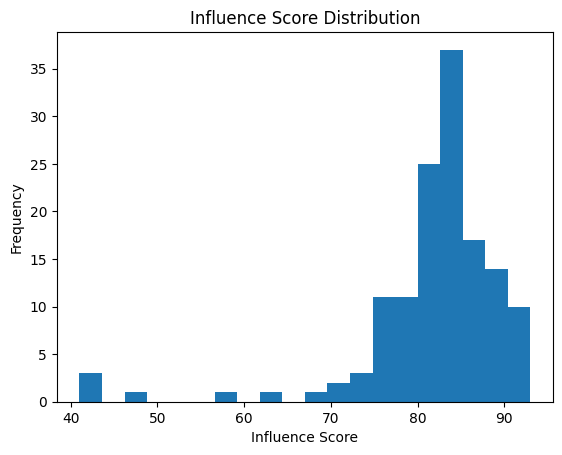

In [877]:
# Assuming df is your DataFrame and the column name is 'Influence Score'
df['Influence_Score'].plot.hist(bins=20)
plt.title("Influence Score Distribution")
plt.xlabel("Influence Score")
plt.ylabel("Frequency")
plt.show()

##### Followers distribution

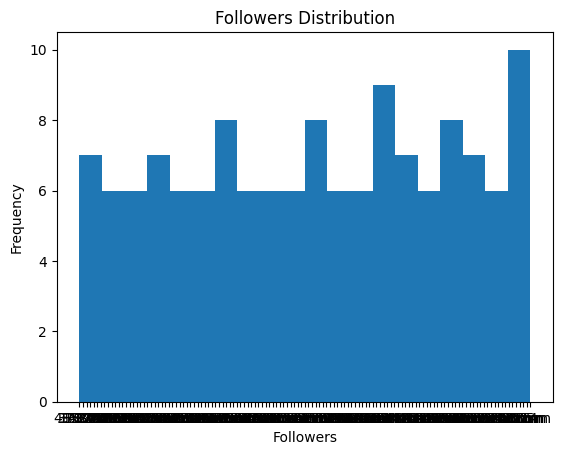

In [878]:
# Followers
followers = df['Followers'].dropna()  # Remove NaN values
plt.hist(followers, bins=20)
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Followers Distribution')
plt.show()

##### Posts distribution

In [879]:
df['Posts'] = pd.to_numeric(df['Posts'], errors='coerce')

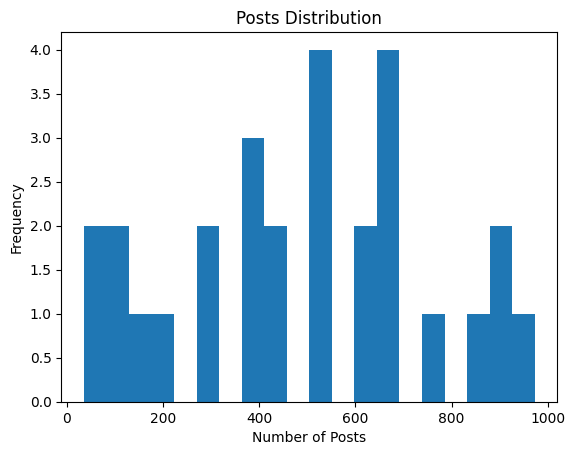

In [880]:
# Assuming 'Posts' is a column in your DataFrame 'df'
df['Posts'].plot.hist(bins=20)
plt.title("Posts Distribution")
plt.xlabel("Number of Posts")
plt.ylabel("Frequency")
plt.show()


##### Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using a bar chart.

C:\Users\hp.MUKESH-LF4B6N6\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


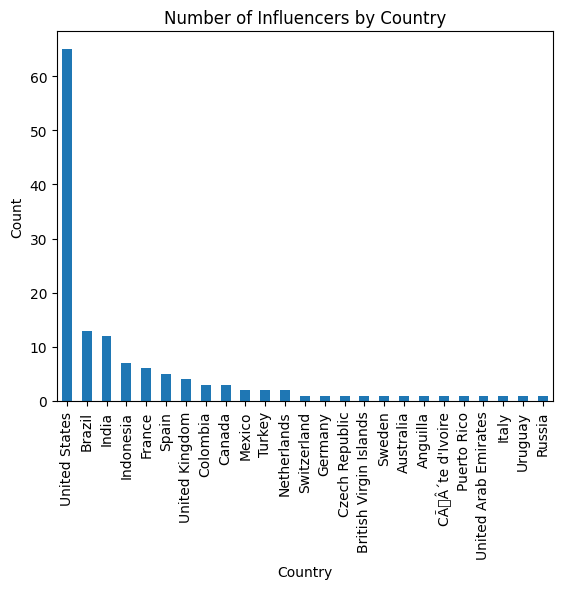

In [881]:
country_counts = df['Country Or Region'].value_counts()
country_counts.plot(kind='bar')
plt.title("Number of Influencers by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


### Who are the top 10 influencers in the given dataset based on the following features: 

#### Top 10 by Followers

In [882]:
top_10_followers = df.sort_values(by='Followers', ascending=False).head(10)
top_10_followers

,Rank,Influence_Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New_Post Avg. Likes,Total_Likes,Country Or Region
33,34,85,88.0m,1.4,NaN,0.008,735.9k,2.3b,United States
34,35,74,87.3m,2.1,NaN,0.017,1.5m,2.7b,United Kingdom
35,36,88,83.2m,1.4,NaN,0.006,505.8k,2.5b,United States
36,37,88,83.1m,1.2,NaN,0.014,1.1m,4.3b,United States
37,38,85,82.7m,1.6,NaN,0.008,644.6k,5.6b,United States
41,42,85,75.9m,2.4,NaN,0.015,1.1m,7.9b,United States
42,43,86,75.4m,1.2,NaN,0.007,517.7k,1.9b,United States
44,45,88,73.4m,NaN,NaN,0.000,25.9k,432.0m,United States
46,47,84,71.4m,1.5,NaN,0.008,585.9k,3.4b,India
47,48,82,71.2m,1.8,NaN,0.017,1.2m,3.3b,India


##### Top 10 by Average Likes

In [883]:
top_10_avg_likes = df.sort_values(by='New_Post Avg. Likes', ascending=False).head(10)
top_10_avg_likes

,Rank,Influence_Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New_Post Avg. Likes,Total_Likes,Country Or Region
75,76,42,58.3m,NaN,NaN,0.017,989.2k,1.8b,Spain
4,5,91,339.4m,1.8,NaN,0.003,932.0k,12.6b,United States
60,61,77,65.4m,1.8,NaN,0.014,926.8k,5.4b,United States
59,60,87,66.5m,NaN,785.0,0.013,842.9k,472.6m,United States
158,159,78,39.2m,NaN,NaN,0.002,84.4k,1.8b,United States
16,17,90,202.7m,2.0,NaN,0.004,837.1k,12.9b,United States
191,192,79,33.8m,NaN,NaN,0.002,83.2k,2.2b,Germany
95,96,79,51.9m,NaN,NaN,0.016,826.2k,9.0b,Netherlands
198,199,79,33.5m,NaN,865.0,0.003,82.6k,167.2m,Brazil
143,144,73,41.8m,1.0,NaN,0.020,817.9k,1.5b,Brazil


####  Top 10 by Total Likes

Text(0.5, 1.0, 'Followers vs Total Likes')

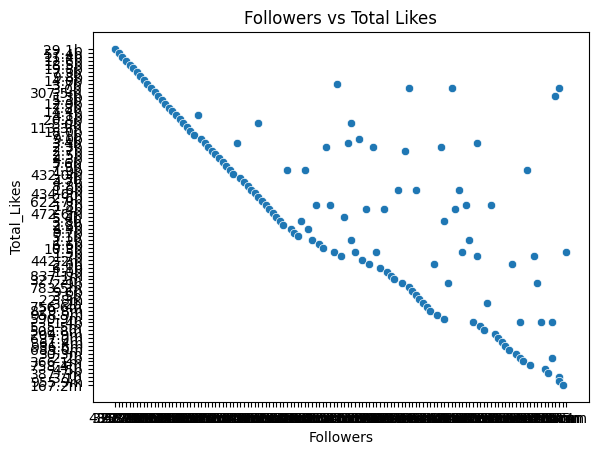

In [884]:
# Followers and Total Likes
sns.scatterplot(data=df, x='Followers', y='Total_Likes')
plt.title('Followers vs Total Likes')


#### Describe the relationship between the following pairs of features using suitable graphs:

#### Followers and Total_Likes

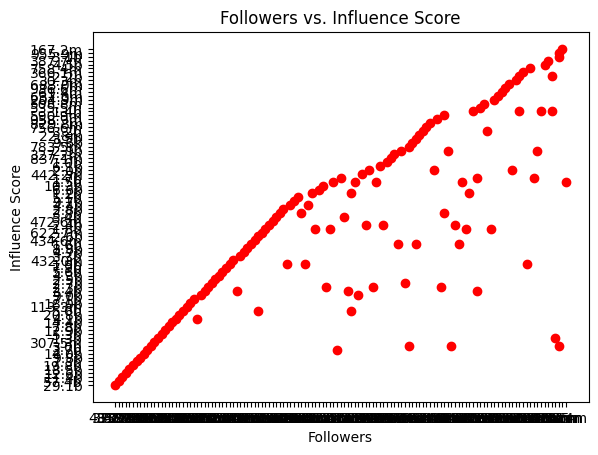

In [885]:
plt.scatter(df['Followers'], df['Total_Likes'], c='r')
plt.title("Followers vs. Influence Score")
plt.xlabel("Followers")
plt.ylabel("Influence Score")
plt.show()

#### Followers and Influence Score

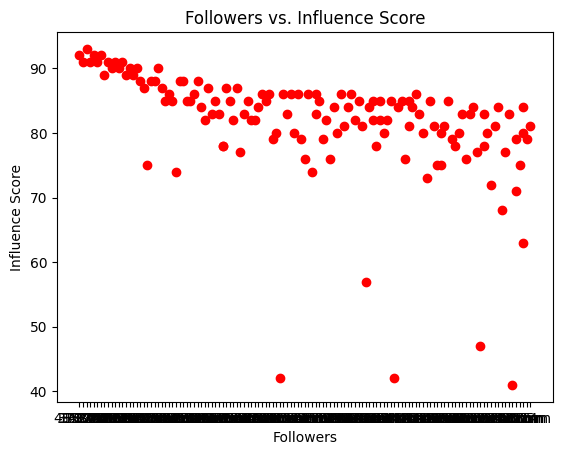

In [886]:
plt.scatter(df['Followers'], df['Influence_Score'], c='r')
plt.title("Followers vs. Influence Score")
plt.xlabel("Followers")
plt.ylabel("Influence Score")
plt.show()

#### Posts and Influence Score

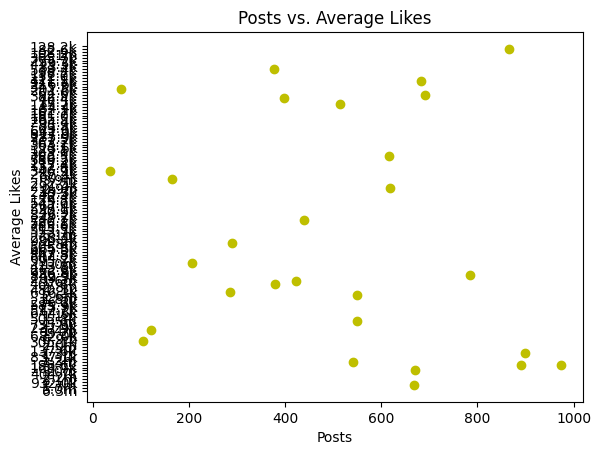

In [887]:
plt.scatter(df['Posts'], df['New_Post Avg. Likes'],c='y')
plt.title("Posts vs. Average Likes")
plt.xlabel("Posts")
plt.ylabel("Average Likes")
plt.show()

####  Posts and Average likes

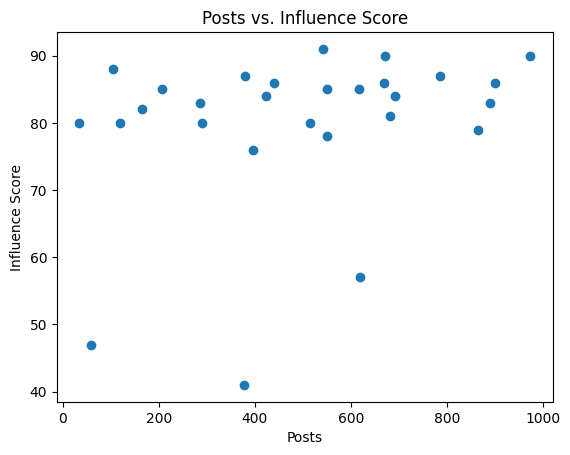

In [888]:
plt.scatter(df['Posts'], df['Influence_Score'])
plt.title("Posts vs. Influence Score")
plt.xlabel("Posts")
plt.ylabel("Influence Score")
plt.show()
